# Descripcion
Papemill es un paquete de python que permito reproducir de manera automática jupyer notebooks.  Solo se necesita especificar una serie de parametros.  Se crea un jupyter notebook "plantilla", el cual se corre una vez, y luego desde la terminal, un código python, u otro jupyter notebook se corre la herramienta, y se genera un nuevo fichero jupyter notebook por parámetro sobre el cual hayamos querido iterar.  Aquí usaremos la opción del jupyter notebook, e iteraremos sobre el año en que tenemos datos de satélite de temperatura (como en los tutoriales anterirores).

Pueden leer más sobre esta herramienta aquí:
* https://papermill.readthedocs.io/en/latest/ 
* https://papermill.readthedocs.io/en/latest/usage-execute.html 
* https://medium.com/y-data-stories/automating-jupyter-notebooks-with-papermill-4b8543ece92f 

# Parametros:

In [33]:
dominio = [-100., -85., 18., 32.] #'Golfo de Mexico' lon_min, lon_max, lat_min, lat_max
zona = 'Golfo de Mexico'
nombre_salida = "TEMPLATE_espacial"


In [34]:
print('Zona: ', zona)
print('Dominio: ', dominio)

Zona:  Golfo de Mexico
Dominio:  [-100.0, -85.0, 18.0, 32.0]


In [35]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import glob
from collections import Counter
from netCDF4 import Dataset

import cmocean as cmo



In [36]:
# fichero = '../../../shared-readwrite/ERA5/ERA5_Coarse.nc' ## 
fichero = '/home/jovyan/shared/datos_para_tutoriales/Talleres_intermedios/7-Octubre-2025/datos_espaciales_python/20251004120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc'


In [37]:
fileobj = xr.open_dataset(fichero) # importando el archivo
sst = fileobj['analysed_sst'][:] # Leyendo las variables del archivo, como dijimos, un nombre auto-explicativo
sst = sst - 273.15 # convertiendo a Celsius de Kelvin

## Seleccionamos los datos de la zona especificada:

## Nuestra zona al completo:

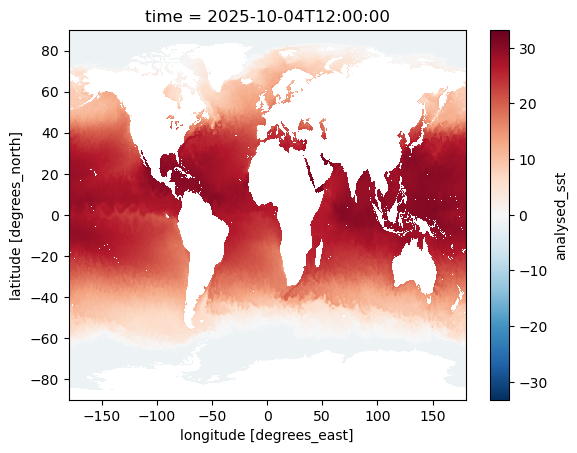

In [38]:
sst.plot()

## Nuestra zona seleccionada:

In [40]:
sst_sel = sst.where((sst.lon > dominio[0]) & 
                    (sst.lon < dominio[1]) &
                    (sst.lat > dominio[2]) &
                    (sst.lat < dominio[3])
                   , drop = True); # El ";" es para que no se muestren los outputs de esta función


In [48]:
sst_sel = sst_sel.squeeze()

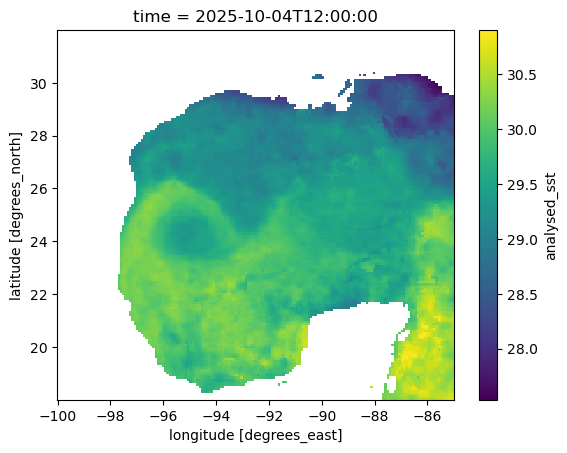

In [49]:
sst_sel.plot()

## Graficamos los valores de temperatura para esa zona:

In [50]:
cmap = cmo.cm.thermal


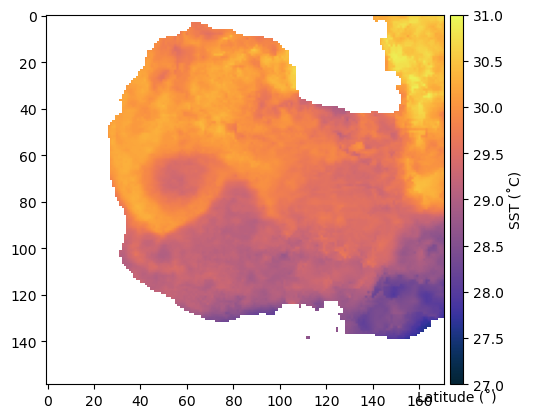

In [53]:
fig, ax = plt.subplots()
image = plt.imshow(sst_sel,cmap=cmap,
                  vmin=27,vmax=31)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)

plt.xlabel('Longitude (˚)')
plt.xlabel('Latitude (˚)')
cbar.set_label('SST (˚C)') 
plt.show()

## Calculamos y visualizamos ahora la anomalía de SST:

### En este caso solo quitaremos una media espacial:

In [66]:
print('La media de SST en el día ' + str(sst_sel.time.values)[0:10] + ' para esta zona fue:', sst_sel.mean().values, '˚C')

La media de SST en el día 2025-10-04 para esta zona fue: 29.592548 ˚C


In [68]:
print('La anomalía de SST en el día ' + str(sst_sel.time.values)[0:10] + ' para esta zona fue:')

La anomalía de SST en el día 2025-10-04 para esta zona fue:


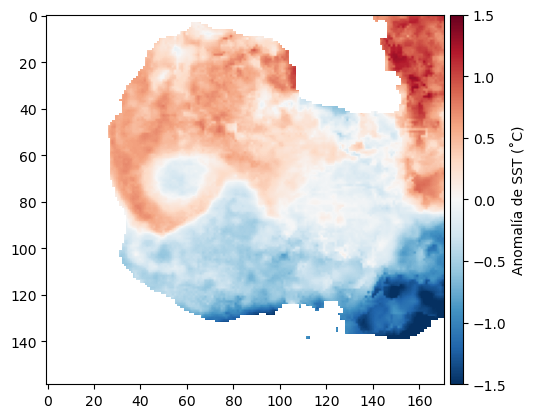

In [73]:
fig, ax = plt.subplots()
image = plt.imshow(sst_sel - sst_sel.mean(), cmap='RdBu_r'
                  , vmin=-1.5, vmax=1.5)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])

cbar= plt.colorbar(image, cax=cax)
cbar.set_label('Anomalía de SST (˚C)') 
plt.show()

In [74]:
import subprocess

# Construimos el comando nbconvert usando el parámetro: nombre_entrada
command = f'jupyter nbconvert --to html --no-input {nombre_salida}.ipynb --output {nombre_salida}.html'

# Ejecutamos el comando
subprocess.run(command, shell=True, check=True)

# Cualquier fichero exisitente previamente se sobreescribirá con el nuevo generado aquí.

[NbConvertApp] Converting notebook TEMPLATE_espacial.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 804398 bytes to TEMPLATE_espacial.html


CompletedProcess(args='jupyter nbconvert --to html --no-input TEMPLATE_espacial.ipynb --output TEMPLATE_espacial.html', returncode=0)

# Ejercicio:
Probar de ahora crear un fichero papermill, y generar este notebook para otras zonas Latinoamericanas